## Compare Sentence Embedding Features

In [16]:
import pandas as pd
import numpy as np

from IPython.display import Markdown, display

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### Load Data

In [17]:
df = pd.read_parquet('data/wine/wine_review.parquet.gzip')
print(df.shape)
df[['title', 'description', 'winery', 'year', 'variety', 'points', 'price']].head()

(100538, 16)


,title,description,winery,year,variety,points,price
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Nicosia,2013,White Blend,87,NaN
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Quinta dos Avidagos,2011,Portuguese Red,87,15.0
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Rainstorm,2013,Pinot Gris,87,14.0
3,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",St. Julian,2013,Riesling,87,13.0
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Sweet Cheeks,2012,Pinot Noir,87,65.0


#### Load Embeddings and t-SNE projections

**Helper Function to Load Embeddings**

In [18]:
import os

load = lambda model, dirname = 'data/wine': (pd.read_parquet(os.path.join(dirname, f'{model}_embeddings.parquet.gzip')), pd.read_parquet(os.path.join(dirname, f'{model}_tsne.parquet.gzip')))

**Load Sentence Embeddings for Select Models**

In [24]:
jina_v3_embeddings, jina_v3_tsne = load('jina_v3')
jina_v3_embeddings = jina_v3_embeddings.iloc[df.index]
jina_v3_tsne = jina_v3_tsne.iloc[df.index]
mpnet_embeddings, mpnet_tsne = load('mpnet')
jina_v2_embeddings, jina_v2_tsne = load('jina_v2')
minilm_l12_embeddings, minilm_l12_tsne = load('minilm_l12')
minilm_l6_embeddings, minilm_l6_tsne = load('minilm_l6')

models = ['jina-embeddings-v3', 'all-mpnet-base-v2', 'jina-embeddings-v2-small-en', 'all-MiniLM-L12-v2', 'all-MiniLM-L6-v2']
embeddings = [jina_v3_embeddings, mpnet_embeddings, jina_v2_embeddings, minilm_l12_embeddings, minilm_l6_embeddings]
tsne_projections = [jina_v3_tsne, mpnet_tsne, jina_v2_tsne, minilm_l12_tsne, minilm_l6_tsne]

print(jina_v3_embeddings.shape, mpnet_embeddings.shape, jina_v2_embeddings.shape, minilm_l12_embeddings.shape, minilm_l6_embeddings.shape)
print(jina_v3_tsne.shape, mpnet_tsne.shape, jina_v2_tsne.shape, minilm_l12_tsne.shape, minilm_l6_tsne.shape)

(100538, 1024) (100538, 768) (100538, 512) (100538, 384) (100538, 384)
(100538, 2) (100538, 2) (100538, 2) (100538, 2) (100538, 2)


**Display the t-SNE Projections of Sentence Embedding Vectors**

In [65]:
color_map = dict(
  sparkling='forestgreen',
  white='gold',
  rose='deeppink',
  red='darkred',
  dessert='dodgerblue',
)

def plot_tsne(models, embeddings, tsne_projections, hue=None):
  # Create a scatter plot with colors based on variety
  r,c = 1,5
  fig, ax = plt.subplots(r,c, figsize=(5*c,5*r))
  for i, tsne_data in enumerate(tsne_projections):
    __ax = ax[int(i/c)][i%c] if r > 1 else ax[i]
    sns.scatterplot(x=tsne_data.iloc[:, 0], y=tsne_data.iloc[:, 1], s=0.35, ax=__ax, hue=hue, palette=None if hue is None else color_map)
    __ax.set_title(f'{models[i]} Embeddings with {embeddings[i].shape[1]:,d} dimensions')
    __ax.axis('off')

    if hue is not None:
      __ax.legend(title=None, loc='lower center', mode='expand', ncol=df.type.shape[0], frameon=False, fancybox=False, markerscale=10, 
                fontsize='small', bbox_to_anchor=(.0,-0.05,0.9,1), title_fontsize='medium', handletextpad=.45)

  plt.tight_layout()
  plt.show()

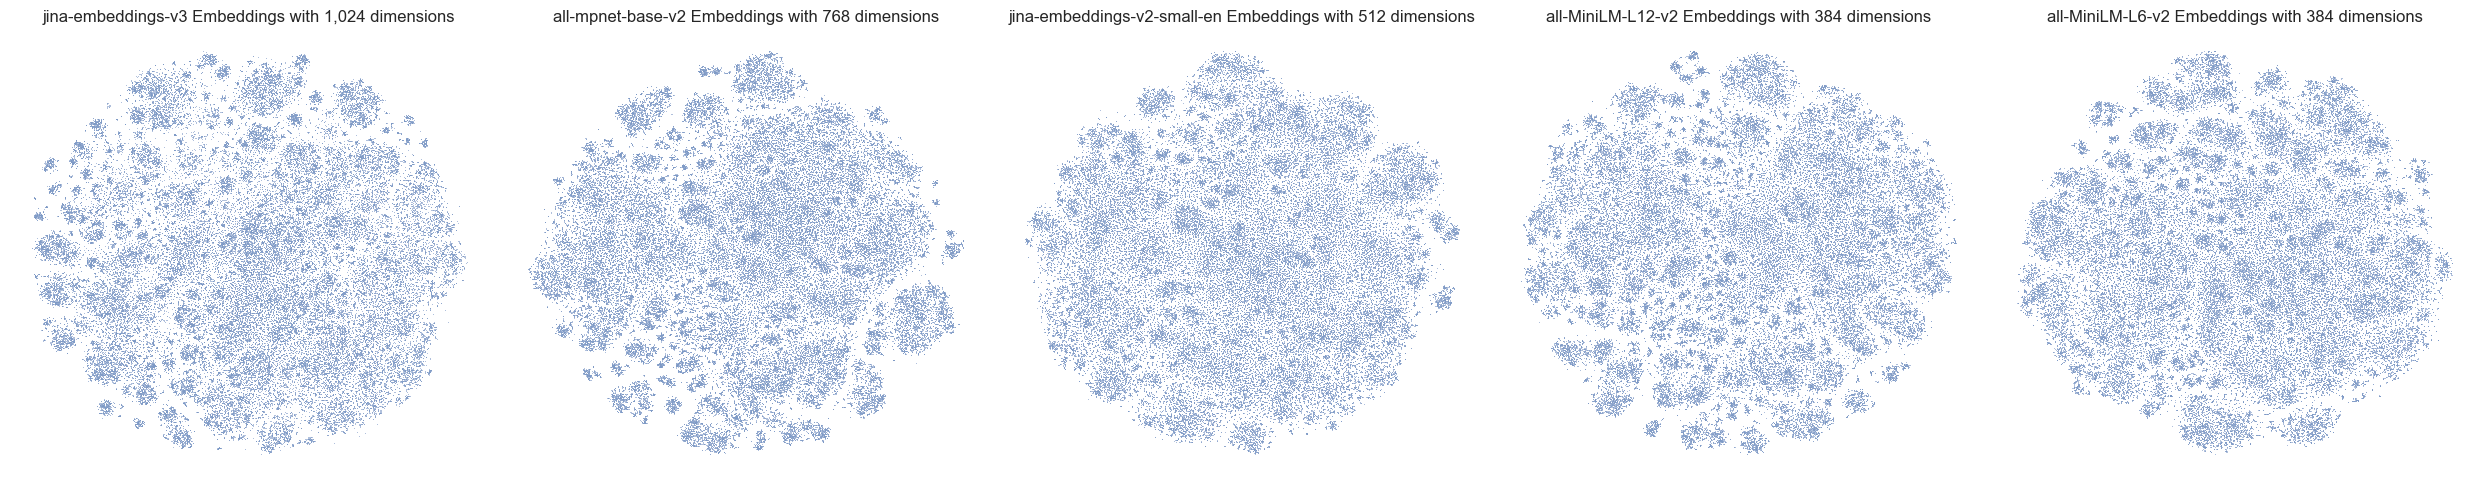

In [67]:
plot_tsne(models, embeddings, tsne_projections)

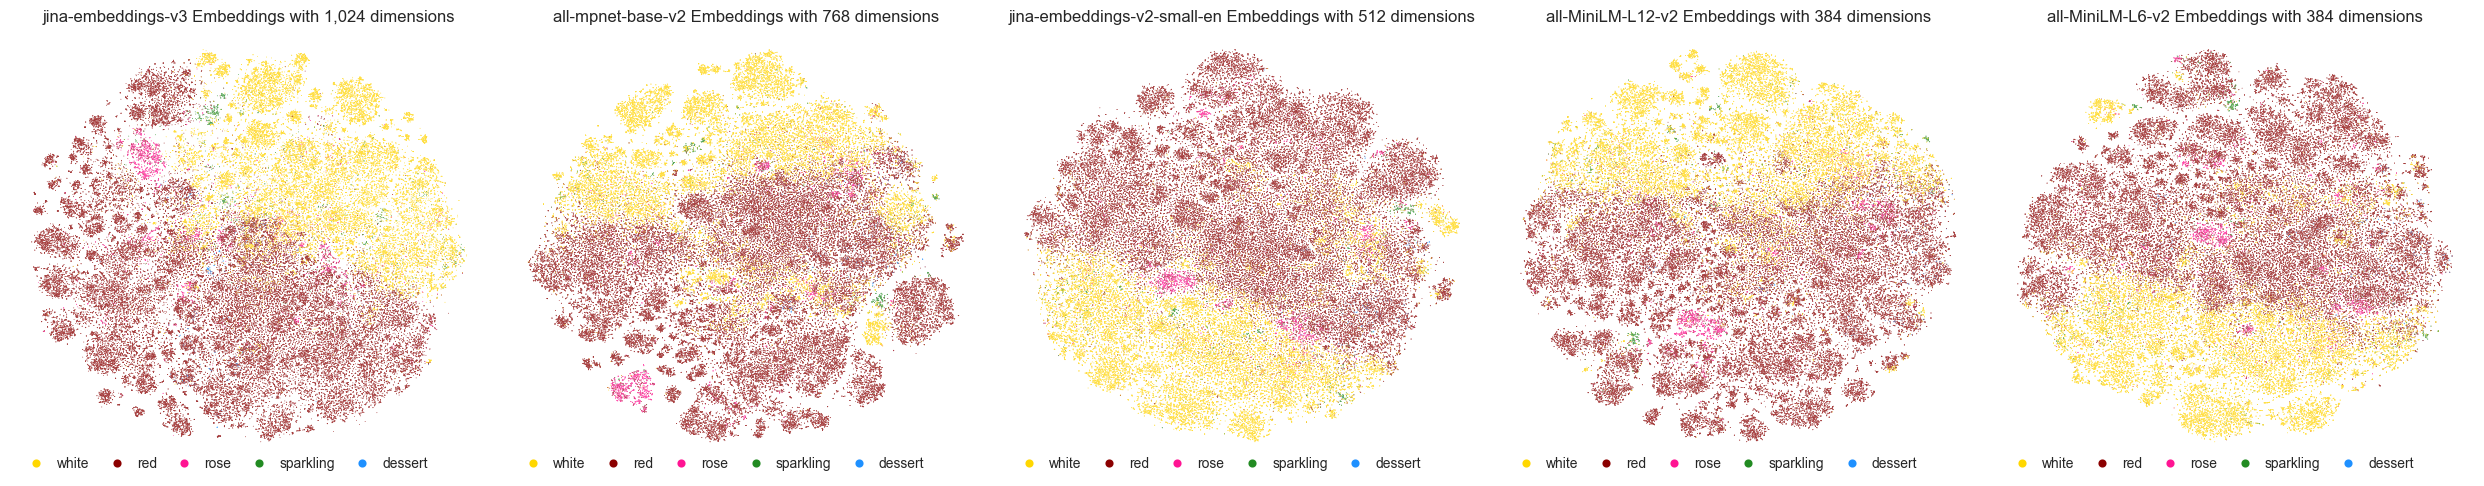

In [66]:
plot_tsne(models, embeddings, tsne_projections, hue=df.type)